In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FormatStrFormatter
from matplotlib.spines import Spine

font_size = 5

# matplotlib.rcParams.keys()
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400,'axes.linewidth':0.5,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)

flatui_3risk = ['#e41a1c','#4daf4a','#ff7f00']
flatui_2cls = ['#377eb8', '#984ea3']

flatui = ['#ff7f00','#4daf4a','#984ea3','#377eb8', '#e41a1c']

sns.set(style='ticks',rc=rc) 
sns.set_context("paper")
# sns.palplot(sns.color_palette(flatui))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign

centimeter = 1/2.54

In [3]:
path = "/media/bgi/guoxiangyu/project/st/pycharm_project/stDeepCluster/result/fulconv_1stbn_p5/"  # best parameters

In [4]:
up_loss,down_loss = np.arange(0.1,1.1,0.1) ,np.arange(0.1,1.1,0.1)

In [6]:
loss_acc = []
loss_ari = []
loss_nmi = []

for i in up_loss:
    for j in down_loss:
        fianl_path = path+'pca15_lr0.002_nConv2_pretrain400_lossw{0}-{1}_batch_result.csv'.format(round(i,1),round(j,1))
        mean_acc = pd.read_csv(fianl_path).iloc[-1,1]
        mean_ari = pd.read_csv(fianl_path).iloc[-1,2]
        mean_nmi = pd.read_csv(fianl_path).iloc[-1,3]
        loss_acc.append(mean_acc)
        loss_ari.append(mean_ari)
        loss_nmi.append(mean_nmi)



In [7]:
step = 10
loss_acc_one = [loss_acc[i:i+step] for i in range(0,len(loss_acc),step)]
loss_ari_one = [loss_ari[i:i+step] for i in range(0,len(loss_ari),step)]
loss_nmi_one = [loss_nmi[i:i+step] for i in range(0,len(loss_nmi),step)]

In [135]:
def figure_heatmap(data,index,title,col):
    f, ax = plt.subplots(figsize=(8*centimeter, 8*centimeter), dpi=400)
    cmap = sns.cm.rocket_r  #colorbar颜色反转
    np_data = np.array(data).reshape(10,10)
    pd_data = pd.DataFrame(np_data,columns =np.around(index,1),index = np.around(index,1), dtype="float")
    color_p = sns.color_palette("RdBu_r", as_cmap=True)
    sns.heatmap(pd_data,square=True,annot=True,fmt='.3f',ax=ax, linewidths=0.25,linecolor="black",
                     cmap = color_p,cbar_kws={"shrink": 0.8, "pad":0.02}, annot_kws={
                'fontsize': 5,
                'fontweight': 'regular',
                'fontfamily': 'sans-serif'
            }).invert_yaxis()
    
    plt.xlabel('con_weigh',color='k', fontsize=5) #x轴label的文本和字体大小
    plt.ylabel('sim_weight', color='k', fontsize=5) #y轴label的文本和字体大小
    
    #ax.set_title('annotation', pad=0, fontsize=5)
    #ax.legend(loc='upper center', bbox_to_anchor=[1.1,0], ncol=6, frameon=False, fontsize=6)
    plt.xticks(fontsize=5) #x轴刻度的字体大小（文本包含在pd_data中了）
    plt.yticks(fontsize=5) #y轴刻度的字体大小（文本包含在pd_data中了）
    #ax.axhline(y=0, color='k',linewidth=10)
    #spine = Spine(ax)
    #print(ax.spines)
    bwith=10
    ax = plt.gca()
    ax.xaxis.set_tick_params(width=0.75, length=1)
    ax.yaxis.set_tick_params(width=0.75, length=1)
    ax.spines['bottom'].set_color('r')
    ax.spines['top'].set_color("0")
    ax.spines['right'].set_color('0')
    ax.spines['left'].set_color("0")
    ax.spines['bottom'].set_color("k")
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    plt.title('Mean of {} among 12 DLPFC samples'.format(title), fontsize=5) #图片标题文本和字体大小
    
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=5, length=1, width=0.75)
    plt.savefig('./supp_fig/tune_loss_weight_{}.pdf'.format(title), dpi=400, bbox_inches='tight')    

    return pd_data

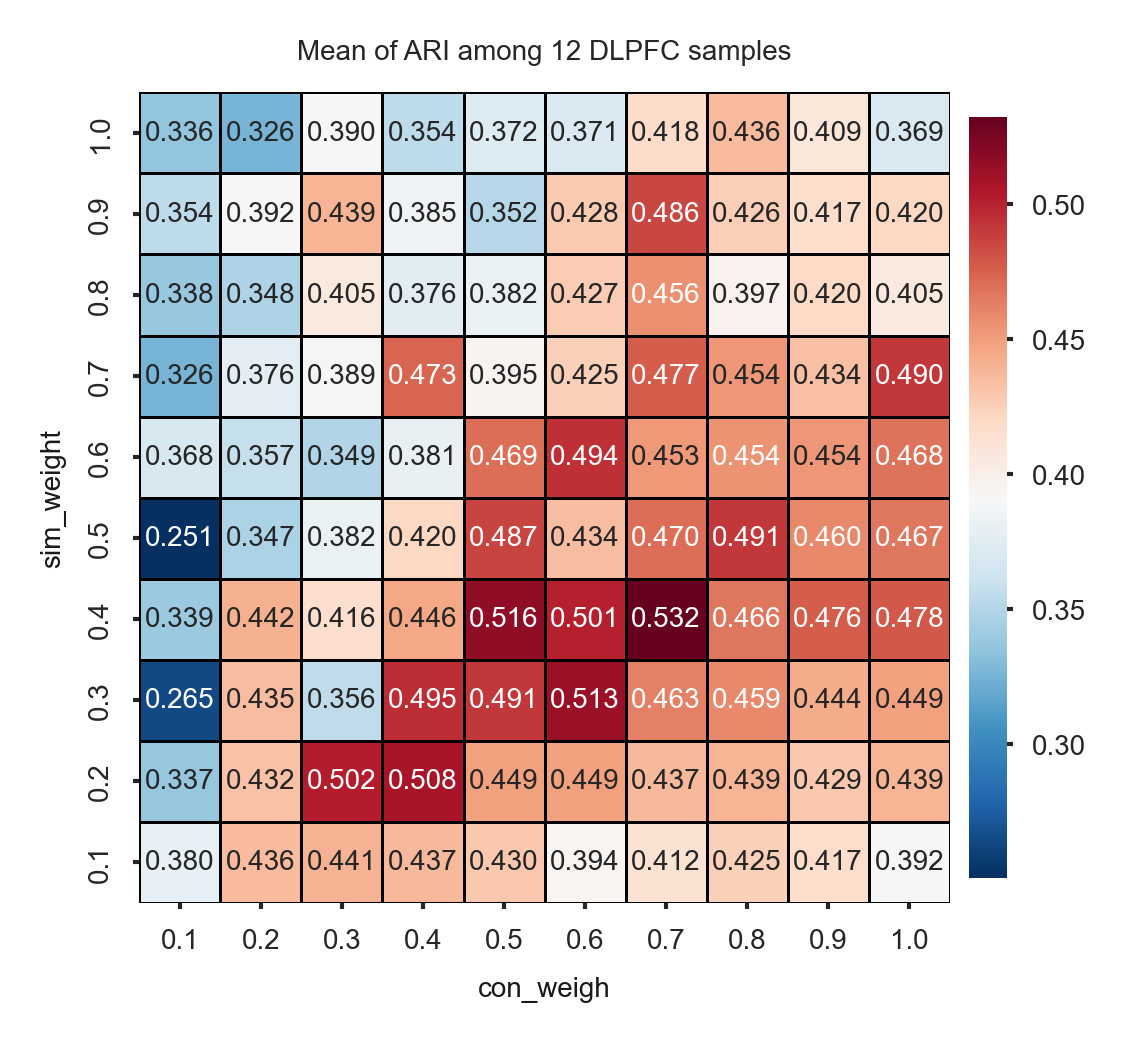

In [136]:
pd_ari = figure_heatmap(loss_ari_one,up_loss,'ARI',col)

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0.1,0.603648,0.600926,0.611548,0.597221,0.589284,0.559747,0.578722,0.590800,0.586359,0.564518
0.2,0.599890,0.612869,0.649780,0.658764,0.617108,0.612562,0.608710,0.607287,0.590837,0.610568
0.3,0.524055,0.620480,0.565843,0.657058,0.652792,0.666629,0.621629,0.632404,0.612478,0.611647
0.4,0.542890,0.610595,0.607593,0.617881,0.663802,0.646479,0.682162,0.626053,0.633775,0.637305
0.5,0.527441,0.562143,0.569489,0.605035,0.647489,0.618590,0.626652,0.646916,0.632971,0.634170
0.6,0.569870,0.561057,0.585728,0.567472,0.646185,0.657266,0.619122,0.621287,0.625531,0.630537
0.7,0.549967,0.571211,0.582126,0.616889,0.588354,0.612339,0.642369,0.623665,0.614957,0.643048
0.8,0.548870,0.556318,0.611800,0.589745,0.580581,0.587419,0.629961,0.585536,0.604878,0.601690
0.9,0.562652,0.563789,0.613375,0.577757,0.557463,0.603908,0.648630,0.600519,0.610635,0.621502
1.0,0.552026,0.559869,0.577562,0.549456,0.580701,0.572641,0.588788,0.614750,0.594759,0.580706


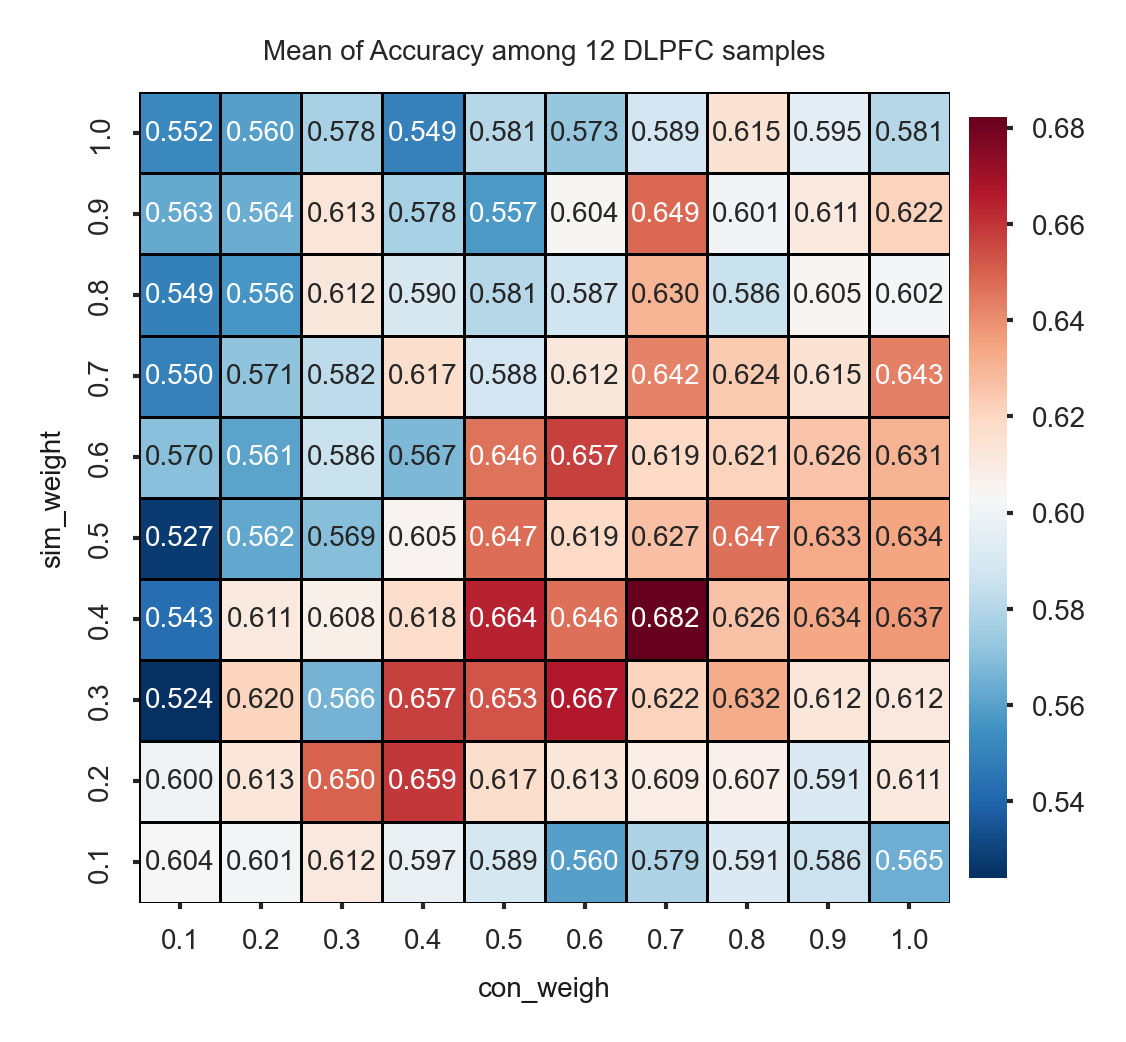

In [137]:
figure_heatmap(loss_acc_one,up_loss,'Accuracy',col)

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0.1,0.525132,0.583860,0.567363,0.567318,0.554837,0.526175,0.536330,0.536762,0.533039,0.511591
0.2,0.475631,0.567531,0.628162,0.635120,0.590017,0.574232,0.560737,0.561534,0.558130,0.558132
0.3,0.439593,0.558456,0.529357,0.618805,0.613195,0.641549,0.608194,0.601890,0.586306,0.575918
0.4,0.488741,0.565275,0.545401,0.593242,0.616479,0.620095,0.643789,0.615813,0.615503,0.610829
0.5,0.424040,0.510761,0.541055,0.558948,0.608438,0.587297,0.617723,0.632207,0.599389,0.607770
0.6,0.500849,0.510347,0.494312,0.543721,0.597495,0.618219,0.606092,0.601251,0.607463,0.602493
0.7,0.465791,0.540947,0.542350,0.578810,0.556765,0.566695,0.600428,0.604101,0.576914,0.614099
0.8,0.489026,0.512334,0.542921,0.527210,0.540376,0.572746,0.601788,0.568665,0.577066,0.559776
0.9,0.511517,0.535506,0.566607,0.537433,0.518520,0.579644,0.600837,0.583044,0.571840,0.575814
1.0,0.489463,0.497319,0.554893,0.511440,0.525149,0.532721,0.569319,0.575646,0.566975,0.546981


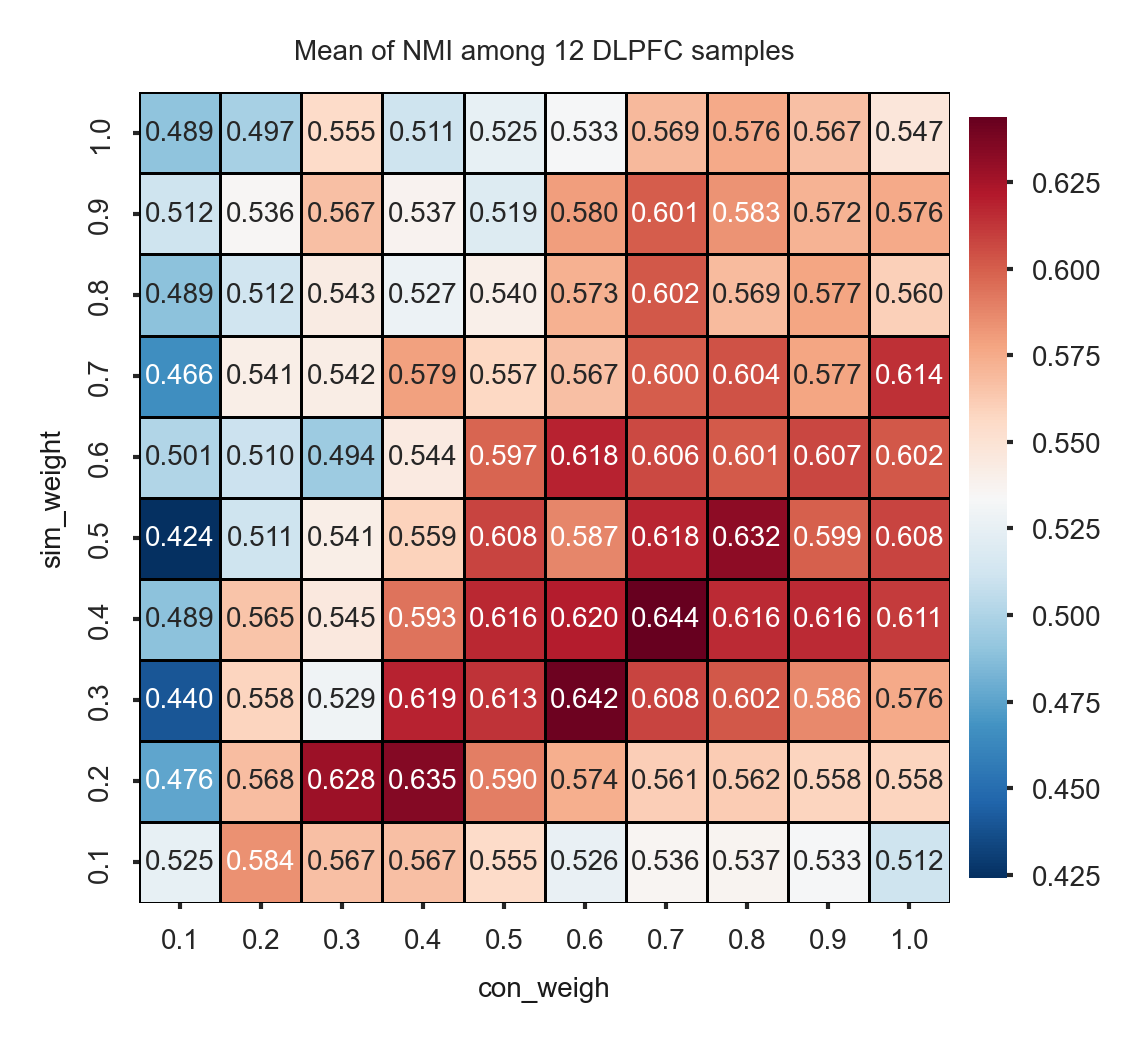

In [138]:
figure_heatmap(loss_nmi_one,up_loss,'NMI',col)

In [56]:

def figure_line(path1,path2,step,value_float,x_label,title):
    
    acc_list = []
    ari_list = []
    nmi_list = []
    for i in step:
    #     print(i)
        fianl_path = path1+path2.format(round(i,value_float))
        #mean_acc  = pd.read_csv(fianl_path).iloc[-1,1]
        mean_ari  = pd.read_csv(fianl_path).iloc[-1,2]
        mean_nmi  = pd.read_csv(fianl_path).iloc[-1,3]
        #acc_list.append(mean_acc)
        ari_list.append(mean_ari)
        nmi_list.append(mean_nmi)


    fig, ax = plt.subplots(figsize=(5*centimeter, 3*centimeter), dpi=400) # 创建图实例
    
    ax.scatter(step,ari_list, s=2)
    ax.plot(step, ari_list, label='ari', lw=0.75)
    
    ax.scatter(step,nmi_list, s=2)
    ax.plot(step, nmi_list, label='nmi', lw=0.75)
    ax.set_facecolor('w')
    ax.spines['bottom'].set_color('0')
    ax.spines['top'].set_color("0")
    ax.spines['right'].set_color('0')
    ax.spines['left'].set_color("0")
    bwith=0.25
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    ax.xaxis.set_tick_params(width=0.75, length=2)
    ax.yaxis.set_tick_params(width=0.75, length=2)
    #ax.xaxis.set_xlabel
    ax.grid(visible=True, color='gray', linewidth=0.25, alpha=0.3)
    ax.set_xlabel(x_label, fontsize=5) #设置x轴名称 x label
    ax.set_ylabel('value', fontsize=5) #设置y轴名称 y label
    ax.set_title(title, fontsize=5) #设置图名为Simple Plot

    plt.xticks(step, fontsize=5, rotation=45)
    plt.yticks(np.arange(0.3, 0.7, 0.05),fontsize=5)
    
    ax.legend(prop={'size': 5}) #自动检测要在图例中显示的元素，并且显示
    
    plt.savefig('./supp_fig/tune_{}.pdf'.format(x_label), dpi=400, bbox_inches='tight')    

    plt.show() #图形可视化
    
    return acc_list,ari_list,nmi_list


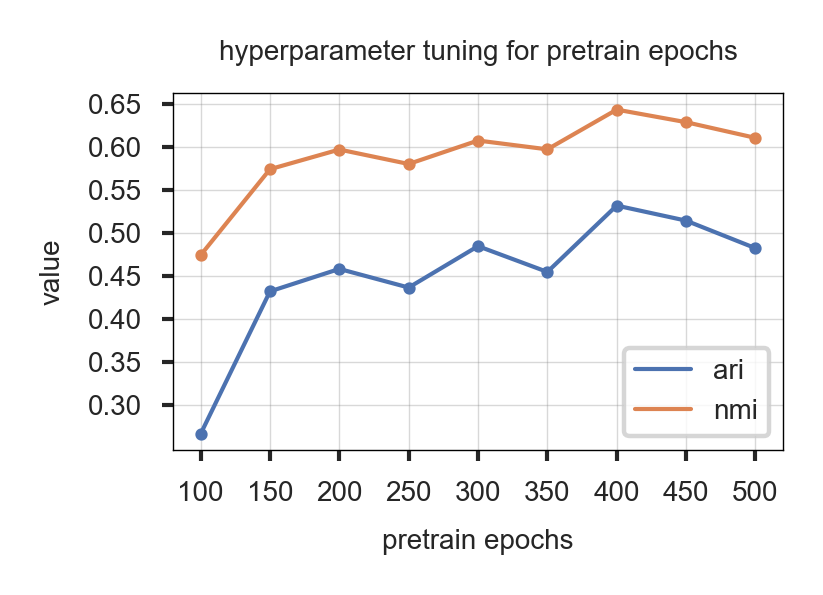

([],
 [0.2665618423542981,
  0.4323297142703904,
  0.4584551965515007,
  0.4367894175014449,
  0.4849340151381545,
  0.454958117246339,
  0.5321471732392203,
  0.5146361226768079,
  0.4826042900884108],
 [0.4744809085153877,
  0.574469546133085,
  0.5973584983904845,
  0.5805305695947103,
  0.6078188197051085,
  0.5975721035910112,
  0.6437886980792241,
  0.6291674993896176,
  0.6109294644394273])

In [54]:
epochs = np.arange(100,550,50)
epoch_path_1 = '/media/bgi/guoxiangyu/project/st/pycharm_project/stDeepCluster/result/fulconv_1stbn_p5_tune_pretrain_epochs/'
epoch_path_2 = 'pca15_lr0.002_nConv2_pretrain{}_lossw0.4-0.7_batch_result.csv'


figure_line(epoch_path_1,epoch_path_2,epochs,0,'pretrain epochs','hyperparameter tuning for pretrain epochs')

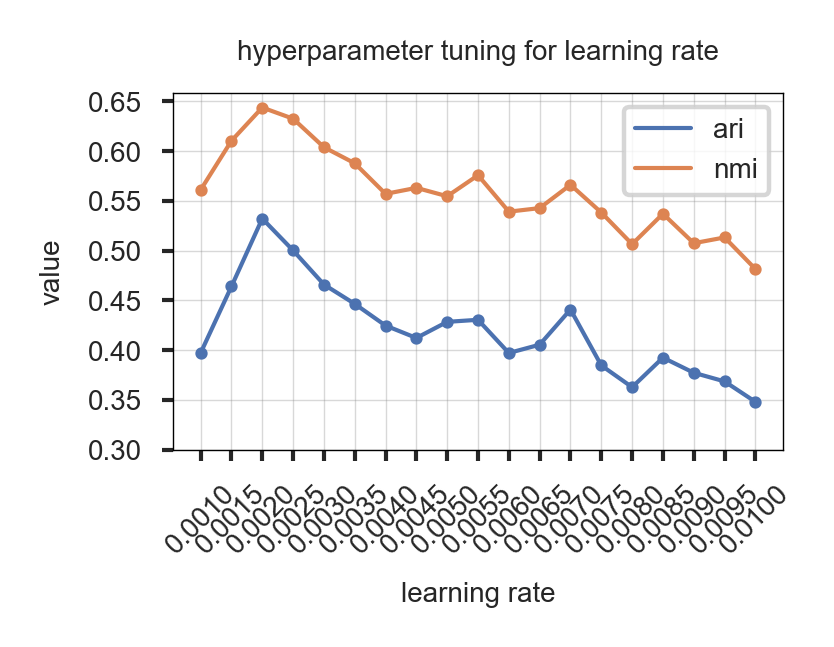

([],
 [0.3970722600208483,
  0.4639368879688412,
  0.5321471732392203,
  0.500123467860112,
  0.4658738529565607,
  0.4464156455496588,
  0.4245839170525966,
  0.4121470321486368,
  0.4283509195495656,
  0.4304059568111029,
  0.397022378781846,
  0.4053805919027519,
  0.4407531978315926,
  0.3845374573775803,
  0.3626397209882756,
  0.3923617399811276,
  0.3771581931148773,
  0.3684599343817019,
  0.3479452716639189],
 [0.5609927042247324,
  0.6103603322521652,
  0.6437886980792241,
  0.6325671715964186,
  0.60389681898993,
  0.587738994166847,
  0.5570052307768653,
  0.5630562211368478,
  0.5546187117362787,
  0.5757396798818102,
  0.5391159320186742,
  0.5426898347455981,
  0.5661347828994353,
  0.5382576854604876,
  0.5064265649233783,
  0.5369900597758994,
  0.5074013911905946,
  0.5131928005406298,
  0.4814560678050044])

In [57]:
lr = np.arange(0.001,0.0104,0.0005)
lr_path_1 = '/media/bgi/guoxiangyu/project/st/pycharm_project/stDeepCluster/result/fulconv_1stbn_p5_tune_lr/'
lr_path_2 = 'pca15_lr{}_nConv2_pretrain400_lossw0.4-0.7_batch_result.csv'

figure_line(lr_path_1,lr_path_2,lr,4,'learning rate','hyperparameter tuning for learning rate')

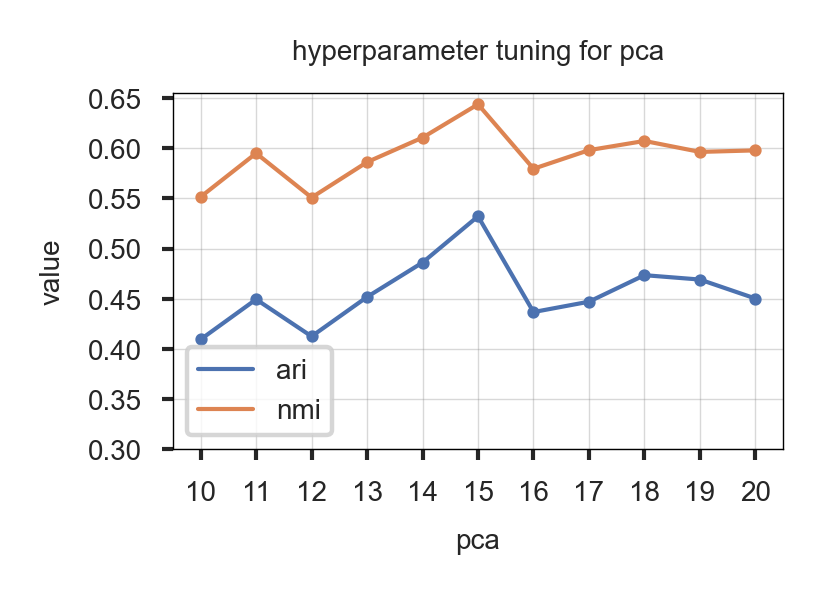

In [55]:
pca = np.arange(10,21,1)
pca_path_1 = '/media/bgi/guoxiangyu/project/st/pycharm_project/stDeepCluster/result/fulconv_1stbn_p5_tune_pca/'
pca_path_2 = 'pca{}_lr0.002_nConv2_pretrain400_lossw0.4-0.7_batch_result.csv'

acc,ari,nmi = figure_line(pca_path_1,pca_path_2,pca,0,'pca','hyperparameter tuning for pca')